In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
#from sklearn.pipeline import make_pipeline
#from sklearn.decomposition import PCA
#from sklearn.preprocessing import StandardScaler

In [19]:
# Read in files and print the information
#train_df = pd.read_csv('AAPL.csv')
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2019, 9, 5)

train_df = web.DataReader("AAPL", 'yahoo', start, end)

In [21]:
train_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-08-22,214.440002,210.750000,213.190002,212.460007,22253700.0,212.460007
2019-08-23,212.050003,201.000000,209.429993,202.639999,46818000.0,202.639999
2019-08-26,207.190002,205.059998,205.860001,206.490005,26043600.0,206.490005
2019-08-27,208.550003,203.529999,207.860001,204.160004,25873300.0,204.160004
2019-08-28,205.720001,203.320007,204.100006,205.529999,15938800.0,205.529999
2019-08-29,209.320007,206.660004,208.500000,209.009995,20990500.0,209.009995
2019-08-30,210.449997,207.199997,210.160004,208.740005,21143400.0,208.740005
2019-09-03,206.979996,204.220001,206.429993,205.699997,20023000.0,205.699997
2019-09-04,209.479996,207.320007,208.389999,209.190002,19188100.0,209.190002


In [23]:
train_df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2435.000000,2435.000000,2435.000000,2435.000000,2.435000e+03,2435.000000
mean,106.658488,104.738891,105.713148,105.719227,7.650956e+07,99.536728
std,51.199167,50.340751,50.738785,50.772268,5.909032e+07,52.016907
min,28.000000,27.178572,27.481428,27.435715,1.136200e+07,23.943514
25%,64.584286,63.153572,63.693571,63.684286,3.232105e+07,56.502115
50%,98.230003,96.580002,97.389999,97.389999,5.747560e+07,90.719131
75%,142.860001,141.080002,142.010002,142.010002,1.043084e+08,136.692673
max,233.470001,229.779999,230.779999,232.070007,4.702495e+08,228.523819


In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2435 entries, 2010-01-04 to 2019-09-05
Data columns (total 6 columns):
High         2435 non-null float64
Low          2435 non-null float64
Open         2435 non-null float64
Close        2435 non-null float64
Volume       2435 non-null float64
Adj Close    2435 non-null float64
dtypes: float64(6)
memory usage: 133.2 KB


In [10]:
#train_feature_df['Adj Close'].plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

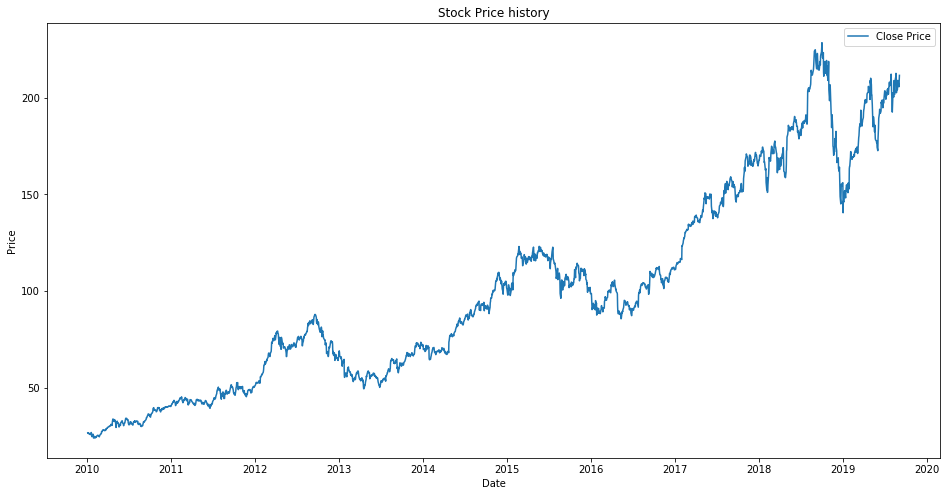

In [31]:
#setting index as date
#train_df['Date'] = pd.to_datetime(train_df.Date,format='%Y-%m-%d')
#train_df.index = train_df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(train_df['Adj Close'], label='Close Price')
plt.xlabel('Date')  
plt.ylabel('Price')  
plt.title('Stock Price history')
plt.legend()

In [32]:
train_df.duplicated().sum()

0

In [75]:
#train_df.isnull().sum()
train_df.isna().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

C:\Users\Kartik Athale\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


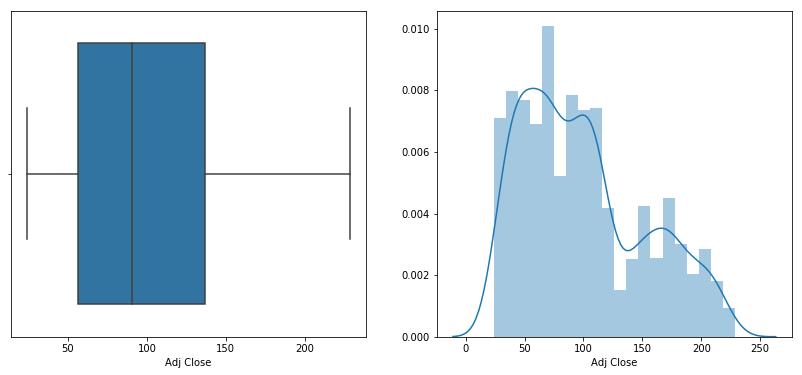

In [34]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(train_df['Adj Close'])
plt.subplot(1,2,2)
sns.distplot(train_df['Adj Close'], bins = 20)
plt.show()

In [71]:
#split into train and validation

train = train_df[:2300]
valid = train_df[2300:]

train_X = train.drop('Adj Close', axis=1)
train_y = train['Close']
valid_X = valid.drop('Close', axis=1)
valid_y = valid['Close']

#train_X = preprocessing.scale(train_X)



#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
#make predictions and find the rmse
preds = model.predict(valid_X)
rms=np.sqrt(np.mean(np.power((np.array(valid_y)-np.array(preds)),2)))
rms

1383088903.6937532

In [73]:
confidencereg = model.score(valid_X, valid_y)

In [74]:
confidencereg

-6975786113296.631

In [68]:
#from sklearn import preprocessing
names = valid_X.columns
valid_X = preprocessing.scale(valid_X)

In [69]:

valid_X = pd.DataFrame(valid_X, columns=names)

In [70]:
valid_X.head()

,High,Low,Open,Volume,Adj Close
0,-1.934180,-1.815653,-1.927738,-0.545120,-1.974919
1,-1.984271,-1.885188,-1.967670,-1.009051,-1.966122
2,-2.010635,-1.924413,-2.012038,0.030737,-1.918623
3,-2.018544,-1.907475,-1.913540,0.067440,-2.069921
4,-1.997454,-1.910149,-1.917090,-0.157532,-1.909826
